## Gradient Descent

Before entering into the second part, let's have a recap of the first part:  
+ These are the things done in the first part:
    + create a linear model
    + iterate over the weight from 0 to 5
    + calculate the loss using the loss function define in the model
    + plot the loss vs. weight
    + determine the opt weight using your EYES...

Everything seems goood, except the last step, i.e. *determine the opt weight using your EYES*, which seems too stupid for an engineer and not is not realistic in real case.  
Therefore, in this part we will use gradient descent, i.e. go to the opposite direction 
of the gra, and the opt (min) can be found after several iterations..

In [8]:
import numpy as np
import matplotlib.pyplot as plt

### Step 1: Define the model:

In [9]:
# Define our model:
class GradDescentModel:
    def __init__(self, weight):
        self.weight = weight

    def forward(self, input_x):
        return input_x * self.weight

    # for traditional grad descent, we will not use loss function
    # we use cost function instead.
    # Differences? -> loss refers to single sample
    #              -> cost refers to average error over all samples
    def cost_function(self, input_x, true_output_y):
        loss = 0
        for x, y in zip(input_x, true_output_y):
            output_prediction = self.forward(x)
            # sum up all the losses for later averaging
            loss += (output_prediction - y) ** 2
        return loss / len(input_x)

    def grad(self, input_x, output_y):
        # reset grad after using it
        grad = 0
        # accumulate all the grad of the sample and calc. its average
        for x, y in zip(input_x, output_y):
            grad += 2 * x * (x * self.weight - y)
        return grad / len(input_x)

# Define initial value in here:
weight = 1
lr = 0.01   # can try play with learning rate here

# Training set
x = np.arange(1.0, 10.0, 1.0)
y = 3 * x

# Initialize some data for plotting
epoch_list = []
cost_list = []

### Step 2: Iterating and trying to find opt weight using GD:

In [11]:
print('Before starting, the weight is: ', weight)

for epoch in range(100):
    model = GradDescentModel(weight)
    cost_validation = model.cost_function(x, y)
    grad_validation = model.grad(x, y)
    weight -= lr * grad_validation
    print('\tEpoch = ', epoch, '\t | Weight = ', weight, '\t | Cost = ', cost_validation)
    cost_list.append(cost_validation)
    epoch_list.append(epoch)
print('After starting, the weight is: ', weight)


Before starting, the weight is:  3.0
	Epoch =  0 	 | Weight =  3.0 	 | Cost =  0.0
	Epoch =  1 	 | Weight =  3.0 	 | Cost =  0.0
	Epoch =  2 	 | Weight =  3.0 	 | Cost =  0.0
	Epoch =  3 	 | Weight =  3.0 	 | Cost =  0.0
	Epoch =  4 	 | Weight =  3.0 	 | Cost =  0.0
	Epoch =  5 	 | Weight =  3.0 	 | Cost =  0.0
	Epoch =  6 	 | Weight =  3.0 	 | Cost =  0.0
	Epoch =  7 	 | Weight =  3.0 	 | Cost =  0.0
	Epoch =  8 	 | Weight =  3.0 	 | Cost =  0.0
	Epoch =  9 	 | Weight =  3.0 	 | Cost =  0.0
	Epoch =  10 	 | Weight =  3.0 	 | Cost =  0.0
	Epoch =  11 	 | Weight =  3.0 	 | Cost =  0.0
	Epoch =  12 	 | Weight =  3.0 	 | Cost =  0.0
	Epoch =  13 	 | Weight =  3.0 	 | Cost =  0.0
	Epoch =  14 	 | Weight =  3.0 	 | Cost =  0.0
	Epoch =  15 	 | Weight =  3.0 	 | Cost =  0.0
	Epoch =  16 	 | Weight =  3.0 	 | Cost =  0.0
	Epoch =  17 	 | Weight =  3.0 	 | Cost =  0.0
	Epoch =  18 	 | Weight =  3.0 	 | Cost =  0.0
	Epoch =  19 	 | Weight =  3.0 	 | Cost =  0.0
	Epoch =  20 	 | Weight =  3.0 	 

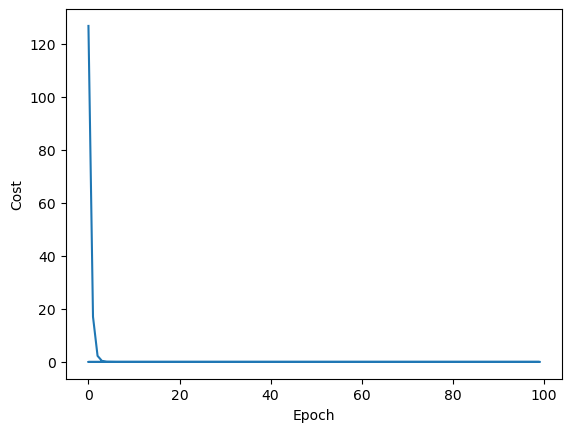

In [12]:
plt.plot(epoch_list, cost_list)
plt.ylabel('Cost')
plt.xlabel('Epoch')
plt.show()